# ANALISIS FORECAST - Sesión 04

- Expositor: César Manuel Quezada Balcazar
- Email: cesar.quezada@dmc.pe
- LinkedIn: www.linkedin.com/in/quezada
- Tema: Modelos de Pronostico - Series de Tiempo

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
path = '/gdrive/MyDrive/BQ - Data Science/BQ - Repositorios/DMC/Forecast/'

**Importamos los módulos necesarios**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

import requests
import statsmodels.api as sm
import io
import os
import pylab
import scipy.stats as stats
from scipy.stats import kstest
from statsmodels.tsa.api import SimpleExpSmoothing, Holt, ExponentialSmoothing
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

**Leemos nuestra serie de tiempo desde un archvo csv**

In [ ]:
# Importar datos en formato csv.
desempleo = pd.read_csv(path + 'desempleo.csv', sep = ';')
desempleo.head(10)

,fecha,tasa_desempleo
0,1/11/2004,8.785895
1,1/12/2004,9.815733
2,1/01/2005,9.140379
3,1/02/2005,9.517384
4,1/03/2005,8.928555
5,1/04/2005,10.023467
6,1/05/2005,9.688153
7,1/06/2005,9.432784
8,1/07/2005,9.239510
9,1/08/2005,7.933715


In [ ]:
desempleo = desempleo.set_index('fecha')
desempleo.head(5)

,tasa_desempleo
fecha,
1/11/2004,8.785895
1/12/2004,9.815733
1/01/2005,9.140379
1/02/2005,9.517384
1/03/2005,8.928555


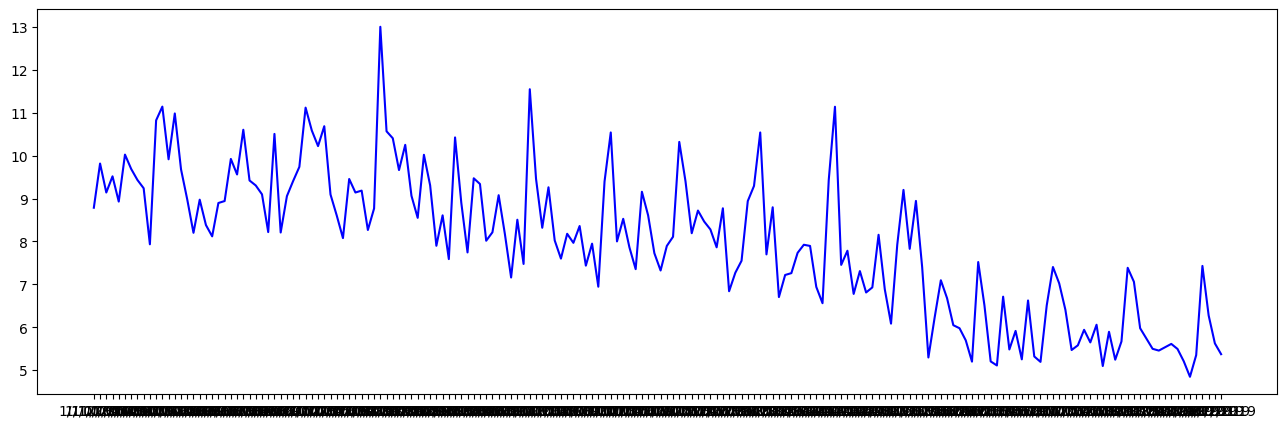

In [ ]:
plt.figure(figsize=(16,5), dpi=100)
plt.plot(desempleo.tasa_desempleo, color = 'blue')
plt.show()

**Particion la serie training/testing**

In [ ]:
desempleo.shape

(182, 1)

Se busca separar el train en 12 puntos

In [ ]:
desempleo.shape[0]/13

14.0

In [ ]:
# Dividimos entre 14
tss = TimeSeriesSplit(n_splits = 14)

In [ ]:
X = desempleo.drop(labels=['tasa_desempleo'], axis=1)
y = desempleo['tasa_desempleo']

In [ ]:
for train_index, test_index in tss.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [ ]:
X_train.shape, X_test.shape

((170, 0), (12, 0))

In [ ]:
y_train.shape, y_test.shape

((170,), (12,))

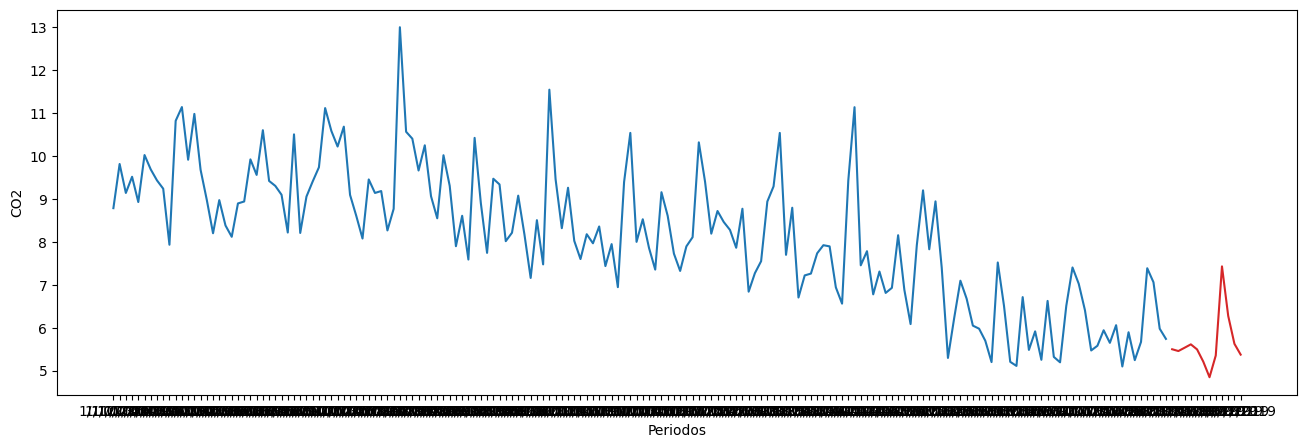

In [ ]:
# Graficamos los periodos train y test
plt.figure(figsize=(16,5), dpi=100)
plt.plot(pd.DataFrame(y_train).index, pd.DataFrame(y_train).tasa_desempleo,color='tab:blue')
plt.plot(pd.DataFrame(y_test).index, pd.DataFrame(y_test).tasa_desempleo,color='tab:red')
plt.xlabel('Periodos')
plt.ylabel('CO2')
plt.show()

In [ ]:
# Assign residuals to variable
# residuals = results_ses.resid

NameError: name 'residuals' is not defined

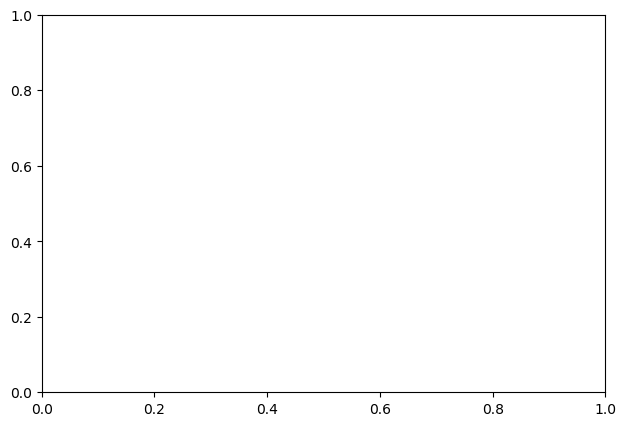

In [ ]:
plt.figure(figsize=(16,5), dpi=100)

plt.subplot(1,2,1)
residuals.plot()
plt.show()

plt.subplot(2,2,1)
residuals.hist()
plt.show()

plt.subplot(1,1,1,)
stats.probplot(residuals, dist="norm", plot=pylab)
plt.show()

## **(1) Suavización Exponencial Simple**

In [ ]:
# Ajustando un modelo de suavización exponencial simple
model_ses = SimpleExpSmoothing(y_train) # cargamos el modelo -> f
# results_ses = model_ses.fit(smoothing_level=0.2,optimized=False) # ajustamos el modelo
results_ses = model_ses.fit(optimized=True) # ajustamos el modelo
forecast_ses = results_ses.forecast(12).rename('forecast alpha = 0.2') # Pronosticamos el modelo

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
print(results_ses.summary())

                       SimpleExpSmoothing Model Results                       
Dep. Variable:         tasa_desempleo   No. Observations:                  170
Model:             SimpleExpSmoothing   SSE                            186.074
Optimized:                       True   AIC                             19.359
Trend:                           None   BIC                             25.630
Seasonal:                        None   AICC                            19.601
Seasonal Periods:                None   Date:                 Mon, 06 Nov 2023
Box-Cox:                        False   Time:                         15:37:17
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.1601206                alpha                 True
initial_level              8.7858951                

In [ ]:
y_test_plot = y_test
y_test.index = forecast_ses.index

In [ ]:
forecast_ses

170    6.083319
171    6.083319
172    6.083319
173    6.083319
174    6.083319
175    6.083319
176    6.083319
177    6.083319
178    6.083319
179    6.083319
180    6.083319
181    6.083319
Name: forecast alpha = 0.2, dtype: float64

In [ ]:
#Calculamos el ECM
error = mean_squared_error(y_test_plot, forecast_ses)
print('Test MSE: %.4f' % error)

Test MSE: 0.5827


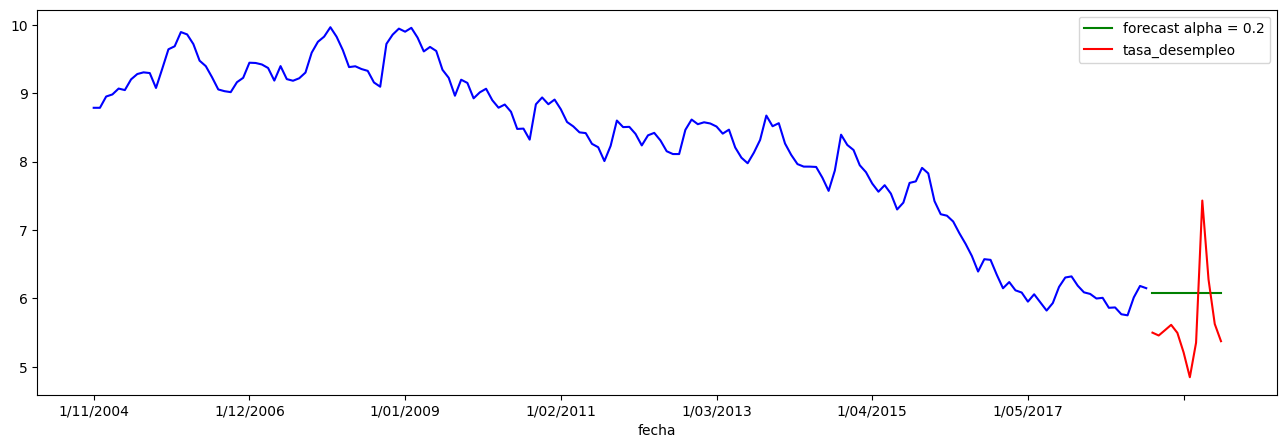

In [ ]:
# plot
plt.figure(figsize=(16,5), dpi=100)
forecast_ses.plot(color='green',legend = True)
results_ses.fittedvalues.plot(color='blue')
y_test_plot.plot(color='red',legend = True)
plt.show()

## **(2) Suavización Exponencial Doble (Holt)**

In [ ]:
# Ajustando un modelo de suavización exponencial simple
model_sed = Holt(y_train) # cargamos el modelo
# results_sed = model_sed.fit(smoothing_level=0.6, smoothing_slope=0.2, optimized=False) # ajustamos el modelo
results_sed = model_sed.fit(optimized=True) # ajustamos el modelo
forecast_sed = results_sed.forecast(12).rename("Holt's linear trend") # Pronosticamos el modelo

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
print(results_sed.summary())

                              Holt Model Results                              
Dep. Variable:         tasa_desempleo   No. Observations:                  170
Model:                           Holt   SSE                            236.649
Optimized:                       True   AIC                             64.233
Trend:                       Additive   BIC                             76.776
Seasonal:                        None   AICC                            64.748
Seasonal Periods:                None   Date:                 Mon, 06 Nov 2023
Box-Cox:                        False   Time:                         15:43:35
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.5143582                alpha                 True
smoothing_trend            0.1067949                

In [ ]:
y_test_plot = y_test
y_test.index = forecast_ses.index

In [ ]:
#Calculamos el ECM
error = mean_squared_error(y_test_plot, forecast_sed)
print('Test MSE: %.4f' % error)

Test MSE: 0.5997


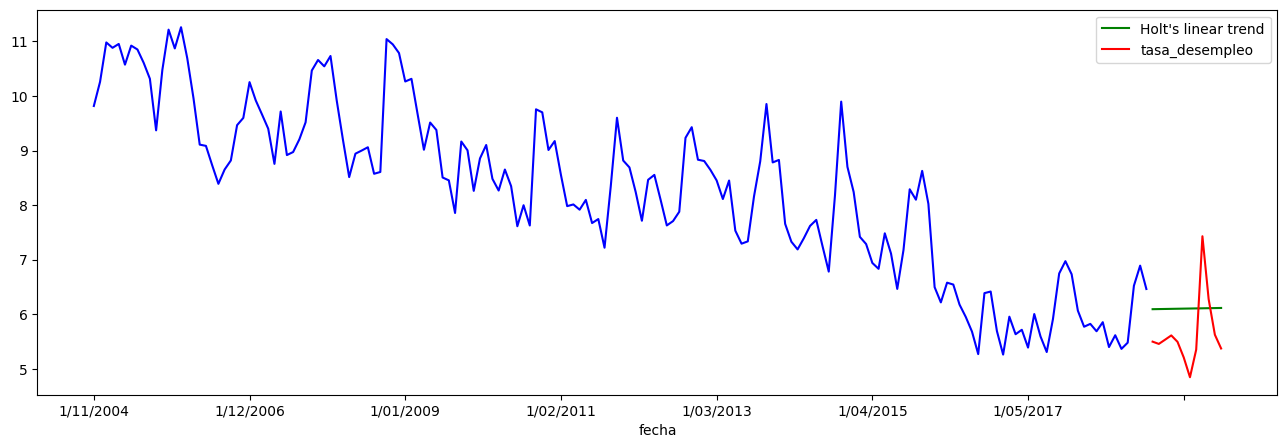

In [ ]:
# plot
plt.figure(figsize=(16,5), dpi=100)
forecast_sed.plot(color='green',legend = True)
results_sed.fittedvalues.plot(color='blue')
y_test_plot.plot(color='red',legend = True)
plt.show()

## **(3) Suavización Exponencial Triple (Holt-Winters)**

In [ ]:
help(ExponentialSmoothing)

Help on class ExponentialSmoothing in module statsmodels.tsa.holtwinters.model:

class ExponentialSmoothing(statsmodels.tsa.base.tsa_model.TimeSeriesModel)
 |  ExponentialSmoothing(endog, trend=None, damped_trend=False, seasonal=None, *, seasonal_periods=None, initialization_method='estimated', initial_level=None, initial_trend=None, initial_seasonal=None, use_boxcox=False, bounds=None, dates=None, freq=None, missing='none')
 |  
 |  Holt Winter's Exponential Smoothing
 |  
 |  Parameters
 |  ----------
 |  endog : array_like
 |      The time series to model.
 |  trend : {"add", "mul", "additive", "multiplicative", None}, optional
 |      Type of trend component.
 |  damped_trend : bool, optional
 |      Should the trend component be damped.
 |  seasonal : {"add", "mul", "additive", "multiplicative", None}, optional
 |      Type of seasonal component.
 |  seasonal_periods : int, optional
 |      The number of periods in a complete seasonal cycle, e.g., 4 for
 |      quarterly data or 7

In [ ]:
# Ajustando un modelo de suavización exponencial simple
model_shw = ExponentialSmoothing(y_train, seasonal_periods=12, trend='add', seasonal='add') # cargamos el modelo
results_shw = model_shw.fit() # ajustamos el modelo
#results_shw = model_shw.fit(use_boxcox = True) # ajustamos el modelo
forecast_shw = results_shw.forecast(12).rename("Forecast Holt-Winters") # Pronosticamos el modelo

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
print(results_shw.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:           tasa_desempleo   No. Observations:                  170
Model:             ExponentialSmoothing   SSE                             84.111
Optimized:                         True   AIC                            -87.622
Trend:                         Additive   BIC                            -37.450
Seasonal:                      Additive   AICC                           -83.093
Seasonal Periods:                    12   Date:                 Mon, 06 Nov 2023
Box-Cox:                          False   Time:                         16:31:28
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.1499055                alpha                 True
smoothing_trend          

In [ ]:
#Calculamos el ECM
error = mean_squared_error(y_test_plot, forecast_shw)
print('Test MSE: %.4f' % error)

Test MSE: 0.0754


El error es pequeño pq se esta considerando tendencia y estacion

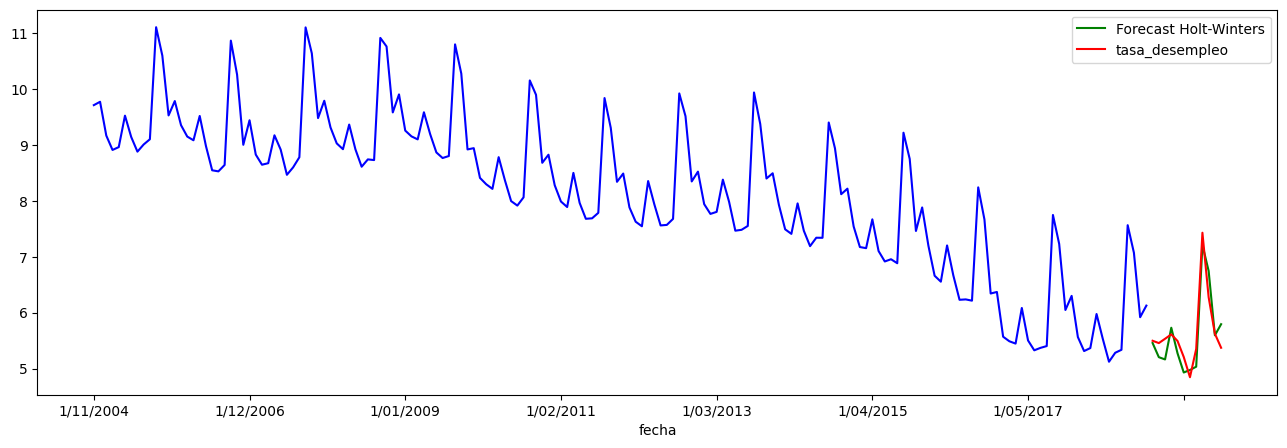

In [ ]:
# plot
plt.figure(figsize=(16,5), dpi=100)
forecast_shw.plot(color='green',legend = True)
results_shw.fittedvalues.plot(color='blue')
y_test_plot.plot(color='red',legend = True)
plt.show()